In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing_datasets

In [2]:
data  = pd.read_csv('../input/thyroid-disease-dataset/thyroid_dataset',index_col= 0)
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,target
0,29,F,f,f,f,f,f,f,f,t,...,f,?,f,?,f,?,f,?,other,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]


In [3]:
data.shape

(9172, 30)

# Data_cleaning

## Splitting_target

In [4]:
data.target = data.target.apply(lambda x : x.split('[')[0])

In [5]:
data.target.value_counts()

-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64

In [6]:
data['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [7]:
data = data.replace('?',np.NaN)

In [8]:
data.isna().sum()

age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG                          8823
referral source                 0
target        

In [9]:
y = data['target'] 

In [10]:
del data['TBG']

In [11]:
data.sex.value_counts()

F    6073
M    2792
Name: sex, dtype: int64

In [12]:
data.drop('target',axis = 1,inplace = True)

In [13]:
data = data.replace({'F':1,'M':0,'f':0,'t':1})

In [14]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'referral source'],
      dtype='object')

# Feture_selection

In [15]:
to_drop = ['TSH measured','TBG measured',
       'T3 measured', 'TT4 measured','T4U measured',
       'FTI measured', 'TBG measured','referral source']
data.drop(to_drop,axis = 1,inplace= True)

In [16]:
mean_age = round(data['age'].mean())
data['age'].fillna(mean_age,inplace = True)
data['age'].isna().sum()

0

In [17]:
data['sex'].fillna(1,inplace= True)
data['sex'].isna().sum()

0

In [18]:
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors= 5)

In [19]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI'],
      dtype='object')

In [20]:
nan_cols = ['TSH','T3','TT4','T4U','FTI']
for i in nan_cols:
    data[i] = knnimp.fit_transform(data[[i]])

In [21]:
pd.set_option('display.max_columns',None)

In [22]:
data.head(20)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,29,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.300000,1.970629,108.700305,0.976056,113.640746
1,29,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.600000,1.900000,128.000000,0.976056,113.640746
2,41,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.218403,1.970629,108.700305,0.976056,113.640746
3,36,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218403,1.970629,108.700305,0.976056,113.640746
4,32,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218403,1.970629,108.700305,0.976056,113.640746
5,60,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218403,1.970629,108.700305,0.976056,113.640746
6,77,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218403,1.970629,108.700305,0.976056,113.640746
7,28,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.700000,2.600000,116.000000,0.976056,113.640746
8,28,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.200000,1.800000,76.000000,0.976056,113.640746
9,28,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.900000,1.700000,83.000000,0.976056,113.640746


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9172 entries, 0 to 9171
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9172 non-null   int64  
 1   sex                        9172 non-null   float64
 2   on thyroxine               9172 non-null   int64  
 3   query on thyroxine         9172 non-null   int64  
 4   on antithyroid medication  9172 non-null   int64  
 5   sick                       9172 non-null   int64  
 6   pregnant                   9172 non-null   int64  
 7   thyroid surgery            9172 non-null   int64  
 8   I131 treatment             9172 non-null   int64  
 9   query hypothyroid          9172 non-null   int64  
 10  query hyperthyroid         9172 non-null   int64  
 11  lithium                    9172 non-null   int64  
 12  goitre                     9172 non-null   int64  
 13  tumor                      9172 non-null   int64

# Model_building

In [24]:
data['sex'] = data['sex'].astype('int')

In [25]:
x = data

In [26]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)
y

array([ 0,  0,  0, ..., 16,  0,  0])

In [27]:
y

array([ 0,  0,  0, ..., 16,  0,  0])

In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.33,random_state= 42)


In [29]:
y = pd.Series(y)
y.value_counts()

0     6771
18     436
11     359
16     346
9      233
30     196
1      147
20     115
22     111
25     110
31      85
13      49
2       46
17      30
3       21
24      16
29      14
26      14
5       12
19      11
12      10
15       8
6        8
10       6
4        6
28       5
23       2
21       1
14       1
27       1
7        1
8        1
dtype: int64

In [30]:
y_train

array([ 0,  0,  0, ...,  0, 11,  9])

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report


model_dict = {'Decision_tree':DecisionTreeClassifier,'KNN_classfiier':KNeighborsClassifier,'Rand_forest':RandomForestClassifier,
              'Grad_class': GradientBoostingClassifier,'XGB':XGBClassifier}
def scores_models(model_dict,xtrain,x_test,y_train,y_test):

    
    score_d = {}
    for i in model_dict:
        model = model_dict[i]()
        model.fit(x_train,y_train)
        y_preds = model.predict(x_test)
        score_d[i] = accuracy_score(y_test,y_preds)
    
    return score_d

scores_models(model_dict,x_train,x_test,y_train,y_test)

{'Decision_tree': 0.9091509745622729,
 'KNN_classfiier': 0.7793194582094483,
 'Rand_forest': 0.9137760158572844,
 'Grad_class': 0.8995705318797489,
 'XGB': 0.9207135777998018}

In [32]:
model = XGBClassifier()
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
accuracy_score(y_test,y_preds)

0.9207135777998018

In [33]:
feat_values = model.feature_importances_

In [34]:
len(x.columns)

21

In [35]:
def plot_feature_importance(model):
    importances = model.feature_importances_
    feature_names = model.feature_names_in_
    def sort_key(x): return importances[list(feature_names).index(x)]
    feature_names = sorted(feature_names, key=sort_key, reverse=True)
    importances = sorted(importances, reverse=True)

    sns.set(rc={'figure.figsize': (10, 5)})
    ax = sns.barplot(x=feature_names, y=importances, )
    patches = ax.patches
    for i in range(len(patches)):
        x = patches[i].get_x() + patches[i].get_width()/2
        y = patches[i].get_height()+0.01
        ax.annotate('{:.1f}%'.format(importances[i]*100), (x, y), ha='center')
    plt.xticks(rotation=90)
               
    sns.pointplot(x=feature_names, y=np.cumsum(importances), )

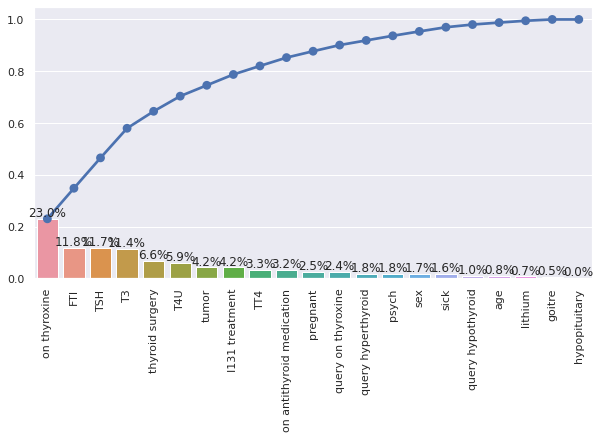

In [36]:
plot_feature_importance(model)